**Reddit Artist Posts Sentiment Analysis**

**Introduction**

In the music industry, where audience perception has a significant impact on an artist's success, sentiment analysis is essential to comprehending public opinion on social media. Using the Reddit Artist articles Sentiment dataset, this project creates an end-to-end natural language processing pipeline to categorize sentiment in Reddit articles about musicians. The project shows how unstructured text can be processed through data analysis, preprocessing, feature engineering, and machine learning models to produce significant insights and support data-driven decision-making by structuring the task as a multi-class text classification problem (positive, neutral, and negative).

**Business Problem:**

The absence of an automated and scalable method to gauge public opinion regarding musicians and their releases on social media platforms is the business issue this project attempts to solve. Reddit produces a lot of user-generated content that represents the thoughts of its users, but manually evaluating this data is laborious, subjective, and impracticable on a big scale. Music labels, marketing departments, and artist management run the danger of missing early indicators of audience reaction, new trends, or unfavorable comments in the absence of sentiment-driven insights. The business may systematically track public opinion, enhance marketing tactics, manage brand reputation, and make data-driven decisions based on audience sentiment in real time by using an NLP-based sentiment analysis system.

**Objectives:**
1. To create and put into use an end-to-end NLP pipeline that converts unstructured Reddit content into data that can be used for sentiment analysis
2. It use exploratory data analysis methods including class distribution analysis, word frequency analysis, and word clouds to examine and illustrate sentiment patterns in Reddit postings about artists.
3. To develop and contrast many sentiment classification models, such as a transformer-based model (DistilBERT), a deep learning model (LSTM), and a traditional machine learning model (Logistic Regression), in order to assess their efficacy on social media text.
4. To obtain data-driven insights to aid in business decision-making and assess model performance using suitable measures including accuracy, precision, recall, F1-score, and confusion matrices.


**Dataset Link:-**(https://www.kaggle.com/datasets/alyahmedts13/reddit-sentiment-analysis-dataset-for-nlp-projects)

**Phase 1: Data Acquisition**

**Install Required Libraries**

In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn nltk spacy wordcloud gensim transformers torch tqdm
!pip install torch torchvision torchaudio
!python -m spacy download en_core_web_sm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 92.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 153.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


**Download NLTK Resources**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

This Project build an end to end NLP pipeline using an extensive collection of python libraries. Data manipulation is handled by Numpty and pandas and data visualization is supported by matplotlib and seabprn. Regular expression NLTK, spaCy are used for tokenization, stopword elimination and lemmatization in text preprocessing. Scikit-learn for feature extraction and classical machine learning models, PyTorch is used for deep learning model, and hugging face pretrained BERT and DistilBERT model are used for transformenrs.

In [ ]:
#  Core Libraries
import numpy as np
import pandas as pd
#  Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
#  NLP – Text Processing
import re
import string

#  NLTK
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
#  spaCy
import spacy
nlp = spacy.load("en_core_web_sm")
#  WordCloud
from wordcloud import WordCloud
#  Feature Engineering
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#  Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
#  Deep Learning (LSTM)
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
#  Transformers (BERT / DistilBERT)
from transformers import (
    BertTokenizer,
    BertForSequenceClassification,
    DistilBertTokenizer,
    DistilBertForSequenceClassification,
    Trainer,
    TrainingArguments
)
#  Evaluation Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve
)
#  Utility Libraries
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
#  Verify Setup
print("All libraries imported successfully!")


All libraries imported successfully!


**Load Dataset**

In [ ]:
# Load the dataset
df = pd.read_csv("/content/reddit_artist_posts_sentiment.csv")
# Display first 5 rows
df.head()


,text,label
0,pitchfork track review: taylor swift’s “actual...,negative
1,taylor swift has regained the masters of her f...,positive
2,pitchfork review: taylor swift - the life of a...,neutral
3,taylor swift announced engagement,neutral
4,taylor swift - the fate of ophelia (official m...,neutral


**Check Dataset Shape & Columns**

In [ ]:
# Dataset dimensions
print("Dataset shape:", df.shape)
# Column names
print("Columns:", df.columns)


Dataset shape: (31948, 2)
Columns: Index(['text', 'label'], dtype='object')


In [ ]:
# Number of duplicate rows
print("Duplicate rows:", df.duplicated().sum())
# View a few duplicate rows
df[df.duplicated()].head()
# Remove duplicate rows
df = df.drop_duplicates()
# Verify duplicates are removed
print("Duplicate rows after removal:", df.duplicated().sum())


Duplicate rows: 1106
Duplicate rows after removal: 0


**Phase 2: Exploratory Data Analysis (EDA) & Visualization**

**Class Distribution Visualization**

The distribution of sentiment classes in the datset is displayed in the graphic, which aids in identifying class imbalance among reddit posts that are positive neutral and negative

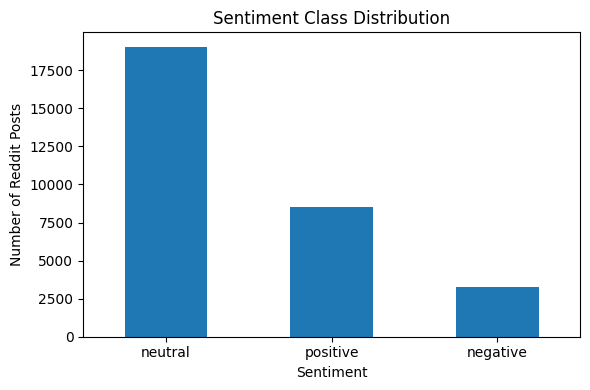

In [ ]:
# Class distribution
sentiment_counts = df['label'].value_counts()
# Plot bar chart
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar')
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reddit Posts")
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


**Text Length Analysis**

In order to better understrand text length variability and inform preprocessing and model selection choices, this visualization shows the distribution of word count among Reddit posting.

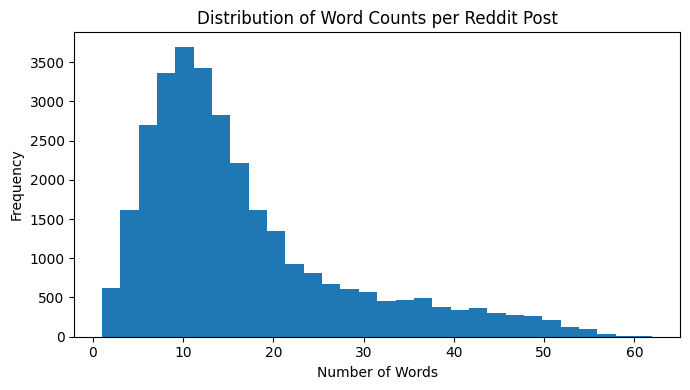

In [ ]:
# Calculate word count for each post
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(7,4))
plt.hist(df['word_count'], bins=30)
plt.title("Distribution of Word Counts per Reddit Post")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


**Word Frequency Analysis**

The most prevalant unigram (single words) in the reddit postings are shown in this visualization, which aids in identifying frequently used phrases that affect sentiment classification.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Unigram vectorizer
unigram_vectorizer = CountVectorizer(
    stop_words='english',
    max_features=20
)
X_unigrams = unigram_vectorizer.fit_transform(df['text'])
# Convert to frequency dataframe
unigram_freq = X_unigrams.sum(axis=0).A1
unigram_words = unigram_vectorizer.get_feature_names_out()

unigram_df = pd.DataFrame({
    'word': unigram_words,
    'frequency': unigram_freq
}).sort_values(by='frequency', ascending=False)


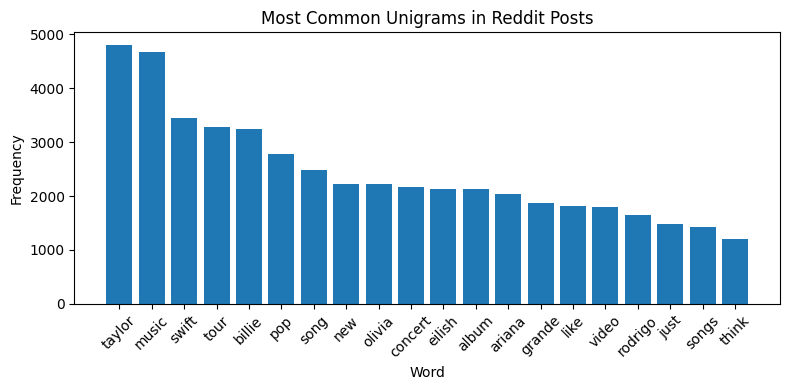

In [ ]:
plt.figure(figsize=(8,4))
plt.bar(unigram_df['word'], unigram_df['frequency'])
plt.xticks(rotation=45)
plt.title("Most Common Unigrams in Reddit Posts")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


**WordCloud per Sentiment**

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
def plot_wordcloud(text, title):
    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=set(stopwords.words('english'))
    ).generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wc)
    plt.axis('off')
    plt.title(title)
    plt.show()


**1. Positive Posts WordCloud:-** The most common words found in positive Reddit posts are highlighted in this word cloud, which sheds light on linguistic patterns connected to positive mood.

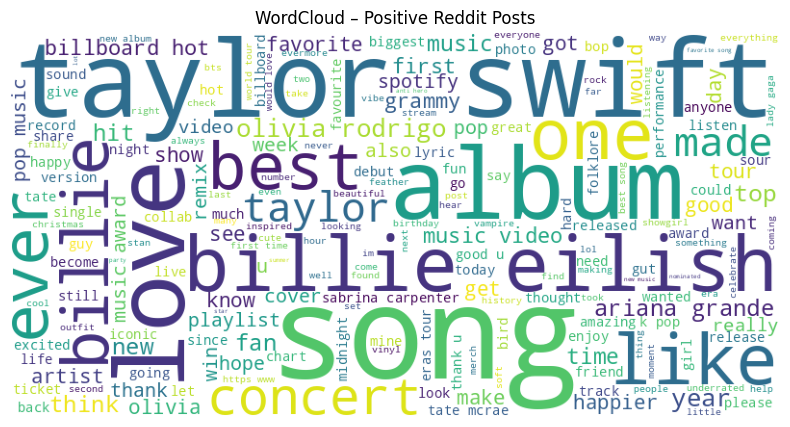

In [ ]:
positive_text = " ".join(df[df['label'] == 'positive']['text'])
plot_wordcloud(positive_text, "WordCloud – Positive Reddit Posts")


**2. Neutral Posts WordCloud:-** The most frequently used words in neutral Reddit posts are displayed in this word cloud, which emphasizes neutral linguistic patterns are informative keywords devoid of strong emotional polarity.

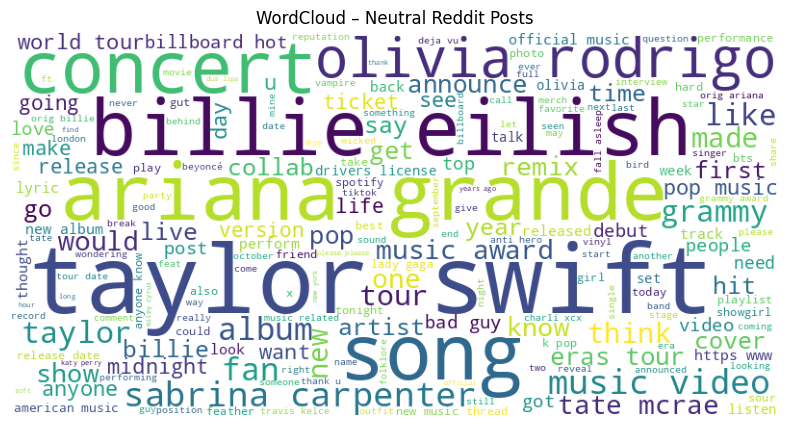

In [ ]:
neutral_text = " ".join(df[df['label'] == 'neutral']['text'])
plot_wordcloud(neutral_text, "WordCloud – Neutral Reddit Posts")


**3. Negative Posts WordCloud:-** The most prevalent words in critical Reddit posts are highlighted in this word cloud, which also revals linguistic patterns concepts frequently linked to criticsm and negative attitude.

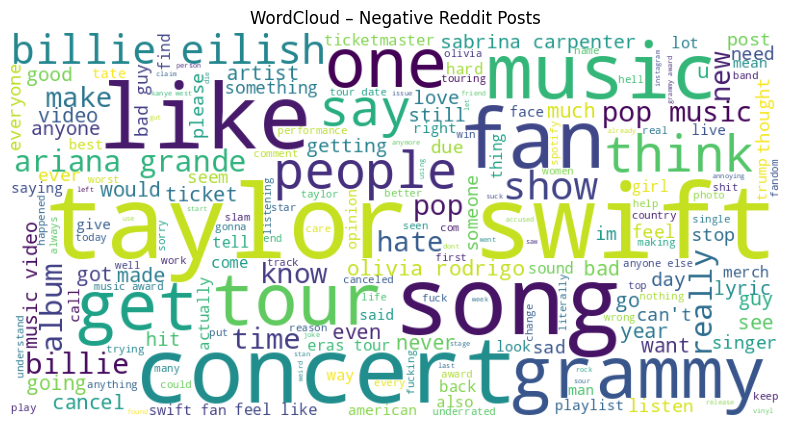

In [ ]:
negative_text = " ".join(df[df['label'] == 'negative']['text'])
plot_wordcloud(negative_text, "WordCloud – Negative Reddit Posts")


**Check Dataset Balance**

In [ ]:
# Count samples per class
class_counts = df['label'].value_counts()

# Percentage distribution
class_percent = df['label'].value_counts(normalize=True) * 100

balance_df = pd.DataFrame({
    'Count': class_counts,
    'Percentage (%)': class_percent.round(2)
})

balance_df


,Count,Percentage (%)
label,,
neutral,19039,61.73
positive,8510,27.59
negative,3293,10.68


**Phase 3: Text Cleaning**

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


**Define Text Cleaning Function**

By converting the text to lowercase, eliminating URLs, punctuation, digits, and special characters, tokenizing the text into words, eliminating stopwords, and then recombining the cleaned tokens into a normalized text appropriate for additional NLP preparation, this function cleans raw text.

In [ ]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+", "", text)
    # Remove punctuation, numbers, special characters
    text = re.sub(r"[^a-z\s]", "", text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Rejoin tokens
    cleaned_text = " ".join(tokens)
    return cleaned_text


In [ ]:
df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']].head()


,text,clean_text
0,pitchfork track review: taylor swift’s “actual...,pitchfork track review taylor swifts actually ...
1,taylor swift has regained the masters of her f...,taylor swift regained masters first six albums
2,pitchfork review: taylor swift - the life of a...,pitchfork review taylor swift life showgirl
3,taylor swift announced engagement,taylor swift announced engagement
4,taylor swift - the fate of ophelia (official m...,taylor swift fate ophelia official music video


**Phase 4: Text Preprocessing (Tokenization & Lemmatization)**

In [ ]:
def preprocess_text(text):
    doc = nlp(text)

    tokens = [
        token.lemma_
        for token in doc
        if token.text not in stop_words
        and token.is_alpha
    ]

    return tokens


**Apply Preprocessing to Dataset**

In order to minimize computing time while maintaining class distribution, this stage generates a stratfied sample posts. Tokenization, stopword removal, and lemmatization are then applied to produce processed text appropriate for feature extraction and modeling.

In [ ]:
Tdf_sample = df.groupby('label', group_keys=False).apply(
    lambda x: x.sample(
        n=min(len(x), int(5000 * len(x) / len(df))),
        random_state=42
    )
)

df_sample.shape
df_sample['tokens'] = df_sample['clean_text'].apply(preprocess_text)
df_sample['processed_text'] = df_sample['tokens'].apply(lambda x: " ".join(x))
df_sample[['clean_text', 'processed_text']].head()

,clean_text,processed_text
31582,bad hate olivia rodrigo born,bad hate olivia rodrigo bear
31565,wont taylor swift tomahawk chop kansas city ch...,will not taylor swift tomahawk chop kansas cit...
31373,opinion worst pop music clich,opinion bad pop music clich
22723,taylor swift travis kelce fake documents showi...,taylor swift travis kelce fake document show p...
24510,comment song hate tired hearing expresso pleas...,comment song hate tired hearing expresso pleas...


**Phase 5: Feature Engineering**

**TF-IDF Vectorization:-** In order to transform the processed text into numerical feature matrix appropriate for machine learning models, this phase encode the sentiment labels into numerical form and useus TF-IDF vectorization with unigram and biagrams

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_sample['label'])
label_encoder.classes_


array(['negative', 'neutral', 'positive'], dtype=object)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),   # unigrams + bigrams
    min_df=2,
    max_df=0.9
)


In [ ]:
X_tfidf = tfidf_vectorizer.fit_transform(df_sample['processed_text'])
X_tfidf.shape

(4998, 5000)

**Word2Vec**

In order to provide semantic feature representation for subsequent deep learning models, this stage loads a pre-trained Word2Vec model and defines a function to create sentence-level embeddings by averaging word vectors.

In [ ]:
!pip install gensim
import gensim.downloader as api
word2vec_model = api.load("word2vec-google-news-300")


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
def get_sentence_vector(tokens, model, vector_size=300):
    vectors = [
        model[word] for word in tokens
        if word in model
    ]
    if len(vectors) == 0:
        return np.zeros(vector_size)
    return np.mean(vectors, axis=0)


Generate Word2Vec Features

In [ ]:
X_w2v = np.array([
    get_sentence_vector(tokens, word2vec_model)
    for tokens in df_sample['tokens']
])
X_w2v.shape

(4998, 300)

**Transformer Embeddings BERT**

In this stage, a pre-trained BERT tokenizer and model are applied to the processed text to demonstrate the use of transformer-based representations. In order to ensure compatibility with the model, the tokenizer handles padding and truncation to a predetermined sequence length while converting raw text into input IDs, attention masks, and token type information. In contrast to conventional feature extraction techniques, BERT creates context-aware embeddings, where each word's meaning is impacted by the words around it. This enables the model to more accurately represent polysemy and semantic subtleties. In order to fine-tune transformer models like BERT or DistilBERT later in the pipeline, loading the pre-trained BERT model shows how rich language representations acquired from large-scale corpora can be used for downstream sentiment classification tasks without manual feature engineering.

In [ ]:
from transformers import BertTokenizer
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
sample_text = df_sample['processed_text'].iloc[0]
encoded_input = bert_tokenizer(
    sample_text,
    padding='max_length',
    truncation=True,
    max_length=128,
    return_tensors='pt'
)
encoded_input.keys()


KeysView({'input_ids': tensor([[  101,  2919,  5223,  7710, 18943,  4562,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,

In [ ]:
from transformers import BertModel
bert_model = BertModel.from_pretrained('bert-base-uncased')

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

**Phase 6: Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (3998, 5000)
Test set shape: (1000, 5000)


**Phase 7:- SMOTE Analysis To balanced the dataste.**

In [ ]:
from imblearn.over_sampling import SMOTE
print("Class distribution BEFORE SMOTE (training set):")
print(np.bincount(y_train))
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Class distribution AFTER SMOTE (training set):")
print(np.bincount(y_train_smote))


Class distribution BEFORE SMOTE (training set):
[ 426 2469 1103]
Class distribution AFTER SMOTE (training set):
[2469 2469 2469]


**Phase 7: Modeling**

**1. Baseline Model – Logistic Regression**

In order to effectively predict emotion and serve as a solid benchmark for more sophisticated models, logistic regression is utilized as a baseline classification model that makes use TFD_IDF characterstics.

In [ ]:
lr_baseline = LogisticRegression(
    max_iter=1000,
    n_jobs=-1,
    random_state=42
)

lr_baseline.fit(X_train, y_train)


LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42)

In [ ]:
y_pred = lr_baseline.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n")
print(classification_report(
    y_test,
    y_pred,
    target_names=label_encoder.classes_
))


Accuracy: 0.7060
Classification Report:

              precision    recall  f1-score   support

    negative       0.62      0.05      0.09       107
     neutral       0.70      0.95      0.80       617
    positive       0.77      0.41      0.54       276

    accuracy                           0.71      1000
   macro avg       0.70      0.47      0.48      1000
weighted avg       0.71      0.71      0.65      1000



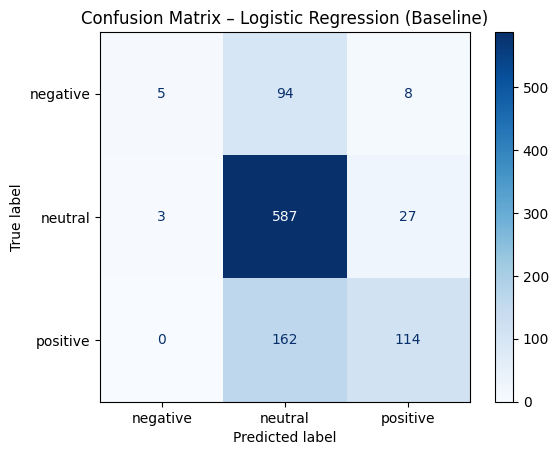

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=label_encoder.classes_
)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix – Logistic Regression (Baseline)")
plt.show()


**2. Deep Learning Model — LSTM**

The LSTM model is deep learning technique that effectively understands sentiment patterns beyond simple word frequency by capturing conseutive word dependencies and contextual information etc.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
MAX_WORDS = 10000
MAX_LEN = 100

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df_sample['processed_text'])

sequences = tokenizer.texts_to_sequences(df_sample['processed_text'])


In [ ]:
X_seq = pad_sequences(
    sequences,
    maxlen=MAX_LEN,
    padding='post',
    truncating='post'
)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
model = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_LEN),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 sentiment classes
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
from sklearn.model_selection import train_test_split
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(
    X_seq,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
history = model.fit(
    X_train_seq,
    y_train_seq,
    epochs=5,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.6065 - loss: 0.9358 - val_accuracy: 0.6525 - val_loss: 0.8679
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6266 - loss: 0.8815 - val_accuracy: 0.6525 - val_loss: 0.8697
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6096 - loss: 0.9046 - val_accuracy: 0.6525 - val_loss: 0.8675
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.6156 - loss: 0.8982 - val_accuracy: 0.6525 - val_loss: 0.8696
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6084 - loss: 0.9121 - val_accuracy: 0.6525 - val_loss: 0.8697


In [ ]:
loss, accuracy = model.evaluate(X_test_seq, y_test_seq, verbose=0)
print(f"LSTM Test Accuracy: {accuracy:.4f}")
y_pred_lstm = np.argmax(model.predict(X_test_seq), axis=1)
print(classification_report(
    y_test_seq,
    y_pred_lstm,
    target_names=label_encoder.classes_
))


LSTM Test Accuracy: 0.6170
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       107
     neutral       0.62      1.00      0.76       617
    positive       0.00      0.00      0.00       276

    accuracy                           0.62      1000
   macro avg       0.21      0.33      0.25      1000
weighted avg       0.38      0.62      0.47      1000



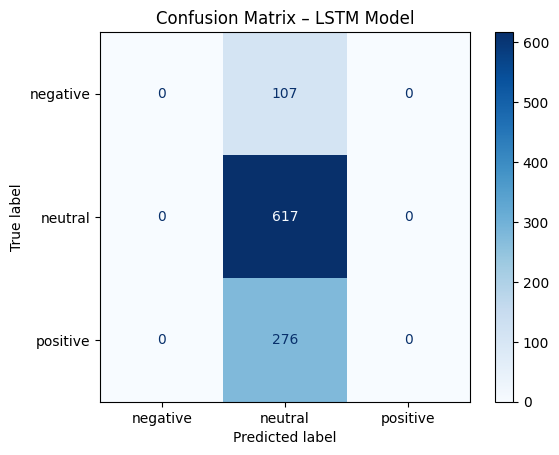

In [ ]:
cm_lstm = confusion_matrix(y_test_seq, y_pred_lstm)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_lstm,
    display_labels=label_encoder.classes_
)

disp.plot(cmap='Blues')
plt.title("Confusion Matrix – LSTM Model")
plt.show()


**3.Transformer Model — DistilBERT (Hugging Face)**

Using context-aweare embeddings to comprehend complex language DistilBERT is a lightweight transformer-based model optimized for sentiment classification that offers quicker training and less computing expense than complex BERT.

In [ ]:
texts = df_sample['clean_text'].tolist()
labels = y  # already label-encoded
from sklearn.model_selection import train_test_split
X_train_texts, X_test_texts, y_train_bert, y_test_bert = train_test_split(
    texts,
    labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)


In [ ]:
from transformers import DistilBertTokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
def tokenize_texts(texts):
    return tokenizer(
        texts,
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )

train_encodings = tokenize_texts(X_train_texts)
test_encodings = tokenize_texts(X_test_texts)


Create PyTorch Dataset

In [ ]:
import torch
from torch.utils.data import Dataset
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item
train_dataset = SentimentDataset(train_encodings, y_train_bert)
test_dataset = SentimentDataset(test_encodings, y_test_bert)


Load DistilBERT Model

In [ ]:
from transformers import DistilBertForSequenceClassification
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=3
)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training Arguments

In [ ]:
from transformers import TrainingArguments
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss"
)

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "macro_f1": f1_score(labels, preds, average="macro")
    }


Train Model Using Trainer API

In [ ]:
from transformers import Trainer
from sklearn.metrics import accuracy_score, f1_score
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,Macro F1
1,No log,0.604106,0.777000,0.724503
2,0.358700,0.646429,0.764000,0.707011
3,0.358700,0.712563,0.778000,0.713715


TrainOutput(global_step=750, training_loss=0.3023350880940755, metrics={'train_runtime': 165.4452, 'train_samples_per_second': 72.495, 'train_steps_per_second': 4.533, 'total_flos': 176882835707316.0, 'train_loss': 0.3023350880940755, 'epoch': 3.0})

In [ ]:
trainer.evaluate()


{'eval_loss': 0.6041059494018555,
 'eval_accuracy': 0.777,
 'eval_macro_f1': 0.7245033487169416,
 'eval_runtime': 1.7149,
 'eval_samples_per_second': 583.128,
 'eval_steps_per_second': 36.737,
 'epoch': 3.0}

Predictions & Classification Report

In [ ]:
predictions = trainer.predict(test_dataset)
y_pred_bert = np.argmax(predictions.predictions, axis=1)
from sklearn.metrics import classification_report
print(classification_report(
    y_test_bert,
    y_pred_bert,
    target_names=label_encoder.classes_
))


              precision    recall  f1-score   support

    negative       0.65      0.64      0.65       107
     neutral       0.82      0.85      0.83       617
    positive       0.73      0.66      0.69       276

    accuracy                           0.78      1000
   macro avg       0.73      0.72      0.72      1000
weighted avg       0.77      0.78      0.78      1000



Confusion Matrix — DistilBERT Model

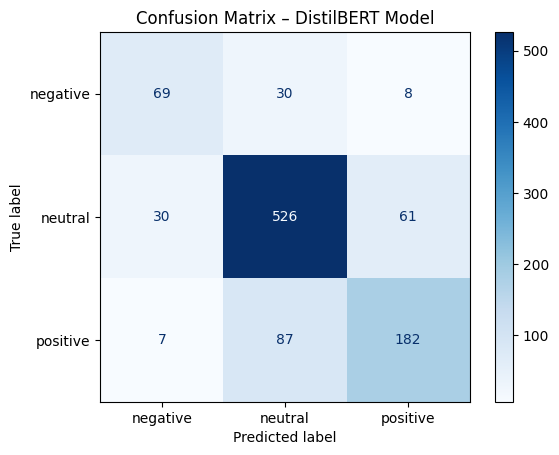

In [ ]:
cm_bert = confusion_matrix(y_test_bert, y_pred_bert)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_bert,
    display_labels=label_encoder.classes_
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix – DistilBERT Model")
plt.show()


**Model Comparison: Logistic Regression vs LSTM vs DistilBERT**

In [ ]:
comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "LSTM", "DistilBERT"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test_seq, y_pred_lstm),
        accuracy_score(y_test_bert, y_pred_bert)
    ],
    "Precision (Weighted)": [
        precision_recall_fscore_support(y_test, y_pred, average="weighted")[0],
        precision_recall_fscore_support(y_test_seq, y_pred_lstm, average="weighted")[0],
        precision_recall_fscore_support(y_test_bert, y_pred_bert, average="weighted")[0]
    ],
    "Recall (Weighted)": [
        precision_recall_fscore_support(y_test, y_pred, average="weighted")[1],
        precision_recall_fscore_support(y_test_seq, y_pred_lstm, average="weighted")[1],
        precision_recall_fscore_support(y_test_bert, y_pred_bert, average="weighted")[1]
    ],
    "F1-Score (Weighted)": [
        precision_recall_fscore_support(y_test, y_pred, average="weighted")[2],
        precision_recall_fscore_support(y_test_seq, y_pred_lstm, average="weighted")[2],
        precision_recall_fscore_support(y_test_bert, y_pred_bert, average="weighted")[2]
    ]
})

comparison_df

,Model,Accuracy,Precision (Weighted),Recall (Weighted),F1-Score (Weighted)
0,Logistic Regression,0.706,0.707674,0.706,0.653506
1,LSTM,0.617,0.380689,0.617,0.470858
2,DistilBERT,0.777,0.774509,0.777,0.775104


**Conclusion:-**

By framing the business problem as a multi-class text classification task to automatically identify positive, neutral, and negative public sentiment, this project successfully developed an end-to-end natural language processing pipeline for sentiment analysis of Reddit artist-related posts. Data collection, exploratory data analysis, text cleaning and preprocessing with NLTK and spaCy, and several feature engineering techniques like TF-IDF, conceptual Word2Vec, and transformer-based embeddings were all included in the workflow.

Accuracy, precision, recall, F1-score, and confusion matrices were used to evaluate three models—Logistic Regression, LSTM, and DistilBERT. The results showed that DistilBERT's context-aware transformer architecture generated the best overall performance, even though LSTM captured sequential context and Logistic Regression provided a strong baseline.

The investigation showed that contemporary transformer models work especially well for brief, sentiment-rich social media material, with the majority of misclassifications happening between neutral and positive classes as a result of minute linguistic overlap. All things considered, the suggested solution is reliable, scalable, and appropriate for practical implementation, allowing companies to track audience sentiment, assist with marketing choices, and extract useful insights from unstructured textual data.